In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import load2disp
import utils

# 2D avec multiple sources

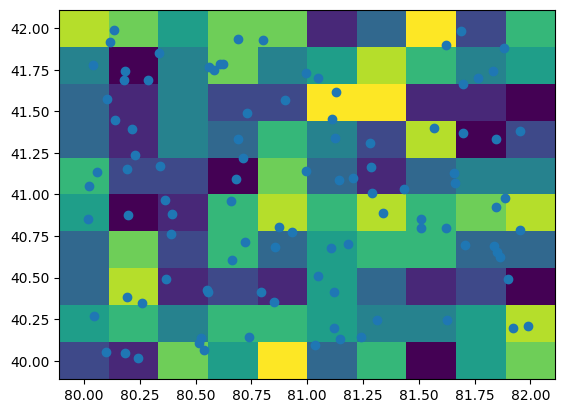

In [8]:
data_directory = '... synthetic_data'

#providing boundaries and ticks for the general domain
xs = np.random.uniform(80, 82, (100,)) #équivalent lons
ys = np.random.uniform(40, 42, (100,)) #equivalent lats
z = 0

data = np.zeros((len(xs),5)) # colonnes:  lat, lon, 

for i in range(len(xs)):
    data[i,0:2] = [xs[i],ys[i]]


#met 2 sources et on associe à chacun ses valeurs de E, v et p 
ps = np.random.randint(0,10,(10,10))*9.81*1000
rs = utils.create_source_mesh(80,82,40,42,ps)
E = 20e9
v = 0.25


for vx_idx in range(len(ps[0,:])): #boucle sur les sources et on va sommet les réusltats sur les vectices pour faire le délacement gloabel 
    for vy_idx in range(len(ps[:,0])):
        p = ps[vy_idx,vx_idx]
        r = rs[vy_idx,vx_idx]
        for i in range(len(xs)):
            xyz = [xs[i], ys[i], z]
            U = load2disp.load2disp(xyz, r, p, E, v)
            data[i,2:5] += U.reshape(3)

plt.plot()
plt.pcolormesh(np.linspace(80,82,10),np.linspace(40,42,10),ps)
plt.scatter(xs,ys)    

#on sauvegarde ce résultat pour servir d'input pour le problème d'inversion !!! 

np.save(f'{data_directory}/data.npy',data)